# HDBSCAN

Assumptions
* There are high-density regions separated by low-density regions

Parameter selection:

* min_cluster_size: The minimum size of clusters; single linkage splits that contain fewer points than this will be considered points “falling out” of a cluster

* gen_min_span_tree: set to True to construct a spanning tree whose sum of edge weights is as small as possible. To connect the points in the "fastest" way possible and avoid unnecessary loops.

* The rest are left by default

Returns (attributes):

In [1]:
from read_clustering.variant_call import VariantCall
path = 'C:/Users/lalaj/PycharmProjects/untitled3/read_clustering/tests/test_files/native_cbf5_gal.csv'
path = '/Users/andrewbailey/CLionProjects/read_clustering/tests/test_files/native_cbf5_gal.csv'
path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/native_cbf5_gal_round30_alt_canonical_supervised_500_500.model.csv"

native = VariantCall(path)

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
list_18 = native.get_contig_positions('RDN18-1')
list_25 = native.get_contig_positions('RDN25-1')

# Determine min_cluster_size

As in DBSCAN, min_samples is best determined according to what makes sense knowing the dataset. Considering the number of points in the clusters found with other algorithms, appropriate cluster_size values should be: 

* 50 for 18S

* 100 for 25S

Plotting with the chosen parameters (light gray is noise):


With cluster_size = 50 for 18S no clusters are identified (all points are light gray). Only until decreasing cluster_size = 5 the following result is seen:

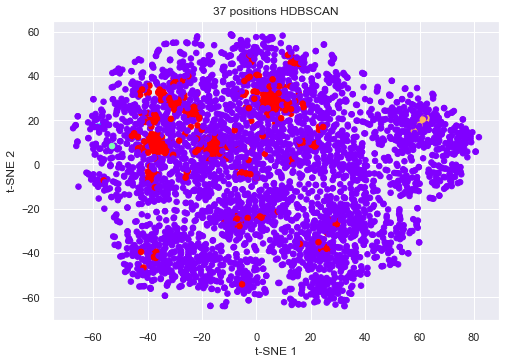

In [4]:
#18S
native.plot_tSNE_reads_covering_positions_data(list_18, 'HDBSCAN', cluster_size = 5) 

No clusters are identified in 25S regardless of how low the cluster_size value is set.

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/hdbscan/hdbscan_.py:219: UserWarning: Cannot generate Minimum Spanning Tree; the implemented Prim's does not produce the full minimum spanning tree 
  'the full minimum spanning tree ', UserWarning)
/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/hdbscan/hdbscan_.py:219: UserWarning: Cannot generate Minimum Spanning Tree; the implemented Prim's does not produce the full minimum spanning tree 
  'the full minimum spanning tree ', UserWarning)


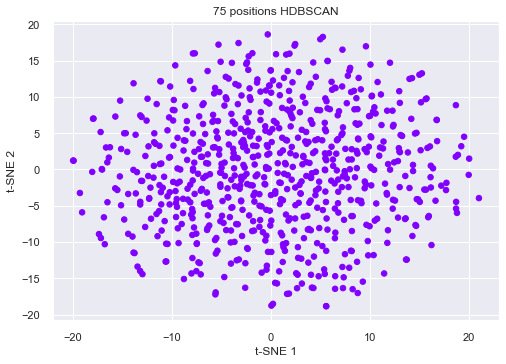

In [4]:
#25S
native.plot_tSNE_reads_covering_positions_data(list_25, 'HDBSCAN', cluster_size = 5) 